En este proyecto final de la asignatura Python para Data Science se analizará un dataset sobre concesiones de acuicultura vigentes en Chile a junio 2024. Para definir la idea general de este proyecto, es relevante explicar en qué consisten la acuicultura y sus concesiones:

La **acuicultura** es la cría, el cultivo y la recolección de organismos acuáticos en agua dulce y salada para el consumo humano y la conservación. Desde un punto de vista legal, el artículo 2 n°3 de la **Ley General de Pesca y Agricultura** vigente define a la acuicultura como la actividad que tiene por objeto la producción de recursos hidrobiológicos organizada por el hombre.

Respecto a las **concesiones de acuicultura**, el cual es el tema de este proyecto, el artículo 2 n°25 de la Ley General de Pesca y Agricultura vigente define a una concesión de acuicultura como el acto administrativo mediante el cual el Ministerio de Defensa Nacional otorga a una persona los derechos de uso y goce, por tiempo indefinido sobre determinados bienes nacionales, para que ésta realice en ellos actividades de acuicultura.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_acuicultura = pd.read_excel("https://www.subpesca.cl/portal/619/articles-92935_listado.xlsx")

In [3]:
#Tamaño dataset concesiones acuicultura
df_acuicultura.shape

(3233, 19)

In [4]:
#Muestra las cinco primeras filas del dataset
df_acuicultura.head()

,codigoCentro,numPert,Comuna,Region,Titulares,NumeroResSSP,FechaResSSP,ResultadoResolucionSSP,NumeroResSSFFAA,FechaResSSFFAA,ResultadoResolucionSSFFAA,EspeciesPT,GrupoPT,GRUPO ESPECIE AGRUPADO,toponimio,tipoBarrio,barrio,TipoPorcion,superficieTotal
0,90201,200091005,CARAHUE,REGIÓN DE LA ARAUCANÍA,"5692719-0: AVILA GALDAMES, HECTOR FERNANDO",1122,2023-05-08,Aprueba,441,2024-03-26,Aprueba,"CHOLGA, CHORITO, CHORO",MITILIDOS,MOLUSCOS,"(1): RÍO IMPERIAL, AL OESTE DE SECTOR SAN PABLO",,,(1): AGUA Y FONDO,1.5
1,104477,219101021,MAULLIN,REGIÓN DE LOS LAGOS,18844230-7: VARGAS MANSILLA MARIA IGNACIA,2111,2022-10-18,Aprueba,39,2024-01-11,Aprueba,"CAROLA, CHASCA, CHASCON O HUIRO NEGRO, CHICORE...",MACROALGAS,ALGAS,"(1): RIO MAULLIN RIBERA NORTE, PARCELA R4",,,(1): AGUA Y FONDO,0.3
2,104476,207105039,ANCUD,REGIÓN DE LOS LAGOS,71780900-9: SINDICATO TRABAJADORES CHAULAR,645,2023-03-13,Aprueba,2723,2023-12-01,Aprueba,"CAROLA, CHASCA, CHASCON O HUIRO NEGRO, CHICORE...",MACROALGAS,ALGAS,"(1): ESTERO CHAULAR, AL OESTE DE PUNTA LARGA. ...",,,"(1): PLAYA , (2): PLAYA , (3): AGUA Y FONDO",4
3,104475,206101181,MAULLIN,REGIÓN DE LOS LAGOS,"10512152-0: CARDENAS BUSTAMANTE, ROBINSON EFIL...",896,2023-04-04,Aprueba,2726,2023-12-01,Aprueba,"CAROLA, CHASCA, CHASCON O HUIRO NEGRO, CHICORE...",MACROALGAS,ALGAS,"(1): RÍO QUENUIR, SECTOR QUENUIR",,,(1): AGUA Y FONDO,7.39
4,104473,209103041,QUEMCHI,REGIÓN DE LOS LAGOS,"10121206-8: PEÑA IMILMAQUI, JUAN VICTOR, 11595...",1418,2023-06-23,Aprueba,2727,2023-12-01,Aprueba,"CHOLGA, CHORITO, CHORO",MITILIDOS,MOLUSCOS,"(1): ESTERO BUTATIQUE, AL ESTE DE ISLA CHEMLLI...",,,(1): AGUA Y FONDO,2.97


In [5]:
#Muestra información general sobre las columnas del dataset
df_acuicultura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   codigoCentro               3233 non-null   int64         
 1   numPert                    3233 non-null   object        
 2   Comuna                     3233 non-null   object        
 3   Region                     3233 non-null   object        
 4   Titulares                  3233 non-null   object        
 5   NumeroResSSP               3233 non-null   int64         
 6   FechaResSSP                3233 non-null   datetime64[ns]
 7   ResultadoResolucionSSP     3233 non-null   object        
 8   NumeroResSSFFAA            3233 non-null   int64         
 9   FechaResSSFFAA             3233 non-null   datetime64[ns]
 10  ResultadoResolucionSSFFAA  3233 non-null   object        
 11  EspeciesPT                 3233 non-null   object        
 12  GrupoP

El dataset de concesiones de acuicultura vigentes a junio 2024 contiene 3233 filas y 19 columnas. Las columnas son:

**codigoCentro**, cuyo tipo de dato es integer y representa al código asignado a cada centro de cultivo de especies acuícolas de acuerdo al Registro Nacional de Acuicultura (RNA).

**numPert**, cuyo tipo de dato es objeto (string) y representa al Número de Pertenencia original de un proyecto de concesión acuícola (código de la solicitud de inscripción de la concesión).

**Comuna**, cuyo tipo de dato es objeto (string) y representa a la comuna en la cual está ubicado un centro de cultivo de especies acuícolas.

**Region**, cuyo tipo de dato es objeto (string), y representa a la región en la cual se ubica un centro de cultivo acuícola.

**Titulares**, cuyo tipo de dato es objeto (string), y representa al RUT y nombre de cada titular (persona natural, empresa o universidad) de una concesión de acuicultura.

**NumeroResSSP**, cuyo tipo de dato es objeto (string), y representa al número de la resolución de la Subsecretaría de Pesca que autoriza o rechaza una concesión de acuicultura.

**FechaResSSP**, cuyo tipo de dato es datetime (fecha), y representa a la fecha de una resolución de la Subsecretaría de Pesca que autoriza o rechaza una concesión de acuicultura.

**ResultadoResolucionSSP**, cuyo tipo de dato es objeto (string), e indica si la Subsecretaría de Pesca autoriza o rechaza una concesión de acuicultura.

**NumeroResSSFFAA**, cuyo tipo de dato es objeto (string), y representa al número de la resolución de la Subsecretaría para las Fuerzas Armadas que autoriza o rechaza una concesión de acuicultura.

**FechaResSSFFAA**, cuyo tipo de dato es datetime (fecha), y representa a la fecha de una resolución de la Subsecretaría para las Fuerzas Armadas que autoriza o rechaza una concesión de acuicultura.

**ResultadoResolucionSSFFAA**, cuyo tipo de dato es objeto (string), e indica si la Subsecretaría para las Fuerzas Armadas autoriza o rechaza una concesión de acuicultura.

**EspeciesPT**, cuyo tipo de dato es objeto (string), y representa a o las especies mencionadas en el Proyecto Técnico requerido para obtener una concesión de acuicultura.

**GrupoPT**, cuyo tipo de dato es objeto (string), y representa al grupo específico autorizado al que pertenecen las especies mencionadas en el Proyecto Técnico requerido para obtener una concesión de acuicultura (por ej. si se trata de un tipo específico de pez tales como los salmónidos, alga del tipo macroalga o molusco del grupo de los choritos).

**GRUPO ESPECIE AGRUPADO**, cuyo tipo de dato es objeto (string), y representa al grupo genérico (peces, algas o moluscos) al que pertenecen las especies mencionadas en el Proyecto Técnico requerido para obtener una concesión de acuicultura.

**toponimio**, cuyo tipo de dato es objeto (string), y representa al lugar geográfico específico (por ej. río, estero, isla, canal, bahía) en el cual se desarrolla una concesión de acuicultura.

**tipoBarrio**,  cuyo tipo de dato es objeto (string), y representa al tipo de agrupación de concesión (por ej. de salmones o moluscos).

**barrio**, cuyo tipo de dato es objeto (string), y consiste en la identificación del número de barrio o agrupación de concesiones de acuicultura (ACS).

**TipoPorcion**,  cuyo tipo de dato es objeto (string), y representa al nombre del tipo de concesión (playa, terreno de playa, agua y fondo).

**superficieTotal**,  cuyo tipo de dato es objeto (string), y representa a la superficie total en hectáreas de los polígonos (áreas de mar donde se ubica la concesión) de acuicultura soliciticados o propuesta de solicitud en concesión.

Debido a que en el dataframe se observa la presencia de celdas vacías, ellas serán rellenadas con el valor NaN para poder verificar de mejor forma si faltan datos en cada columna.

In [6]:
df_acuicultura = df_acuicultura.replace(r'^\s+$', np.nan, regex=True)

/tmp/ipykernel_6181/4152794954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_acuicultura = df_acuicultura.replace(r'^\s+$', np.nan, regex=True)


In [7]:
df_acuicultura.isna().sum()

codigoCentro                    0
numPert                         0
Comuna                          0
Region                          0
Titulares                       0
NumeroResSSP                    0
FechaResSSP                     0
ResultadoResolucionSSP          0
NumeroResSSFFAA                 0
FechaResSSFFAA                  0
ResultadoResolucionSSFFAA       0
EspeciesPT                      0
GrupoPT                         9
GRUPO ESPECIE AGRUPADO          0
toponimio                       3
tipoBarrio                   1886
barrio                       1886
TipoPorcion                     5
superficieTotal                 2
dtype: int64

In [8]:
df_acuicultura.duplicated().sum()

np.int64(0)

En el caso de la columna **GrupoPT** faltan 9 valores. También se observa que faltan 3 valores en la columna **toponimio**, 1886 valores faltantes en la columna **tipoBarrio**, 1886 valores en la columna **barrio**, 5 valores en la columna **TipoPorcion**, y 2 valores en la columna **superficieTotal**. 

No se detectaron filas duplicadas en este dataset.

In [9]:
df_acuicultura.describe(include=object)

,numPert,Comuna,Region,Titulares,ResultadoResolucionSSP,ResultadoResolucionSSFFAA,EspeciesPT,GrupoPT,GRUPO ESPECIE AGRUPADO,toponimio,tipoBarrio,barrio,TipoPorcion
count,3233,3233,3233,3233,3233,3233,3233,3224,3233,3230,1347,1347,3228
unique,3233,56,12,1211,1,1,64,35,4,2502,1,83,14
top,900000005,CISNES,REGIÓN DE LOS LAGOS,96633780-K: MOWI CHILE S.A.,Aprueba,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,(1): ESTERO HUITO,ACS,18C,(1): AGUA Y FONDO
freq,1,373,2143,162,3233,3233,1043,1049,1390,24,1347,60,3140


Al observar los parámetros de los valores de tipo objeto, no se repiten valores en la columna **numPert**.

En el caso de la columna **Comuna**, 56 comunas chilenas aparecen en este dataset, siendo Cisnes la más frecuente debido a que aparece 373 veces en dicha columna. 

Para el caso de la columna **Region** se observa que 12 regiones se encuentran representadas en el dataset, siendo mencionada la Región de Los Lagos 2143 veces en dicha columna. 

Luego en la columna **Titulares** se observan 1211 nombres, siendo 96633780-K: MOWI CHILE S.A. la que posee mayor número de concesiones de acuicultura (162). 

Para la columna **ResultadoResolucionSSP** en todos los casos se aprobaron las solicitudes de concesión. Lo mismo se puede concluir en el caso de la columna **ResultadoResolucionSSFFAA**. 

En la columna **EspeciesPT** existen 64 combinaciones, apareciendo una de ellas 1043 veces en el dataset. En la columna **GrupoPT** existen 35 combinaciones, siendo el grupo salmónidos el más común, con 1049 menciones. 

En el caso de la columna **GRUPO ESPECIE AGRUPADO** existen 4 tipos, siendo peces el más frecuente con 1390 menciones. 

Para el caso de la columna **toponimio** aparecen 2502 lugares distintos, siendo (1): ESTERO HUITO el más común con 24 menciones. 

Para el caso de **tipoBarrio** sólo aparece la sigla ACS en 1347 celdas. 

En la columna **barrio** existen 83 valores, siendo 18C el más común con 60 menciones.

En el caso de **TipoPorcion** existen 14 combinaciones, siendo (1): AGUA Y FONDO la más común con 3140 celdas.

In [10]:
df_acuicultura.describe()

,codigoCentro,NumeroResSSP,FechaResSSP,NumeroResSSFFAA,FechaResSSFFAA,superficieTotal
count,3233.000000,3233.000000,3233,3233.000000,3233,3231.000000
mean,102473.863285,1488.006805,2001-12-12 16:46:10.429941248,1318.832354,2003-08-17 03:01:16.832663168,9.720910
min,10001.000000,3.000000,1977-11-03 00:00:00,3.000000,1980-04-29 00:00:00,0.000000
25%,102104.000000,703.000000,1997-06-26 00:00:00,846.000000,1999-08-24 00:00:00,2.120000
50%,103510.000000,1311.000000,2003-02-28 00:00:00,1251.000000,2003-07-06 00:00:00,5.580000
75%,110211.000000,2145.000000,2006-05-10 00:00:00,1666.000000,2007-06-18 00:00:00,10.365000
max,140024.000000,4453.000000,2023-06-23 00:00:00,4978.000000,2024-03-26 00:00:00,524.470000
std,14809.805403,1007.486980,NaN,788.675005,NaN,17.282162


Las columnas **codigoCentro**, **NumeroResSSP** y **NumeroResSSFFAA** corresponden a identificadores de datos de concesiones de acuicultura, por lo tanto, no tiene sentido analizarlas desde un punto de vista estadístico.

La columna **FechaResSSP** muestra que la concesión más antigua fue aprobada en 1977-11-03, mientras que la resolución de la Subsecretaría de Pesca más reciente fue realizada en 2023-06-23.

La columna **FechaResSSFFAA** muestra que la resolución más antigua es de 2003-08-17, y la más reciente es de 2024-03-26.

La columna **superficieTotal** tiene 3231 valores. Su media es de 9,72 hectáreas. Su valor mínimo es igual a 0 hectáreas, mientras que su valor máximo es igual a 524,47 hectáreas. Su desviación estándard es igual a 17,28 hectáreas. El valor del percentil 25 es igual a 2,12 hectáreas, el percentil 50 o mediana tiene un valor de 5,58 hectáreas, y el percentil 75 tiene un valor de 10,37 hectáreas.

Se revisará el contenido de cada columna y se contabilizará la cantidad de veces que aparece cada valor en cada columna de este dataset.

In [11]:
df_acuicultura["codigoCentro"].value_counts()

codigoCentro
100336    1
90006     1
100068    1
101607    1
30021     1
         ..
104472    1
104473    1
104475    1
104476    1
104477    1
Name: count, Length: 3233, dtype: int64

En la columna **códigoCentro** no se observan códigos repetidos, lo cual concuerda con el hecho que esta columna representa a un tipo de identificación de cada centro de cultivo.

In [12]:
df_acuicultura["numPert"].value_counts()

numPert
900000005    1
900000072    1
900000053    1
900000099    1
900000082    1
            ..
209103091    1
209103041    1
206101181    1
207105039    1
219101021    1
Name: count, Length: 3233, dtype: int64

En la columna **numPert** no se observan códigos repetidos, lo cual concuerda con el hecho que esta columna representa a un tipo de identificación de cada centro de cultivo.

In [13]:
df_acuicultura["Comuna"].value_counts()

Comuna
CISNES                            373
MAULLIN                           361
AISEN                             306
CALBUCO                           232
QUELLON                           208
PUERTO MONTT                      140
ANCUD                             122
QUINCHAO                          119
CASTRO                            110
HUALAIHUE                         107
CHAITEN                            99
QUEMCHI                            97
DALCAHUE                           97
COCHAMO                            96
PUQUELDON                          84
QUEILEN                            84
CURACO DE VELEZ                    82
CHONCHI                            75
NATALES                            71
CALDERA                            55
RIO VERDE                          51
CARAHUE                            44
GUAITECAS                          43
COQUIMBO                           40
PUNTA ARENAS                       23
PUERTO VARAS                       13
CORRA

In [14]:
df_acuicultura["Region"].value_counts()

Region
REGIÓN DE LOS LAGOS                                    2143
REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO     722
REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA          149
REGIÓN DE LA ARAUCANÍA                                   63
REGIÓN DE ATACAMA                                        58
REGIÓN DE COQUIMBO                                       43
REGIÓN DE LOS RÍOS                                       28
REGIÓN DE TARAPACA                                        9
REGIÓN DEL BIOBÍO                                         9
REGIÓN DE ANTOFAGASTA                                     5
REGIÓN DEL MAULE                                          3
REGIÓN DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS          1
Name: count, dtype: int64

En las columnas **Comuna** y **Región** se observa que la mayoría de las concesiones de acuicultura se encuentran localizadas en el sur y extremo sur chileno.

In [15]:
df_acuicultura["Titulares"].value_counts()

Titulares
96633780-K: MOWI CHILE S.A.                  162
79872420-7: EXPORTADORA LOS FIORDOS LTDA.    117
79784980-4: CERMAQ CHILE S.A.                 85
86247400-7: EMPRESAS AQUACHILE S.A.           81
79891160-0: MULTI X S.A.                      74
                                            ... 
6511717-7: SOARZO NECULMAN, ARODYS OMAR        1
5723757-0: VILLANUEVA ARRIAGADA, GERMAN        1
5826927-1: JARAMILLO POZAS, ALBERTO            1
5424200-K: PAREDES PACHECO, JOSE EMILIO        1
6680823-8: PUCHI ACUñA, VICTOR HUGO            1
Name: count, Length: 1211, dtype: int64

Se observa que las empresas Mowi Chile S.A., Exportadora Los Fiordos Ltda., Cermaq Chile S.A., Empresas Aquachile S.A. y Multi X S.A. concentran la mayor cantidad de concesiones de acuicultura.

In [16]:
df_acuicultura["NumeroResSSP"].value_counts()

NumeroResSSP
1081    7
1041    7
474     7
104     6
900     6
       ..
2356    1
1190    1
2672    1
1718    1
2490    1
Name: count, Length: 2138, dtype: int64

En la columna NumeroResSSP se observan códigos repetidos.

In [17]:
df_acuicultura["FechaResSSP"].value_counts()

FechaResSSP
1988-12-30    83
2005-04-01    53
2005-03-30    42
1999-12-22    27
2003-10-28    26
              ..
1986-09-25     1
1987-01-26     1
1987-06-11     1
1984-04-16     1
2023-05-08     1
Name: count, Length: 1105, dtype: int64

La fecha de resolución de la Subsecretaría de Pesca más frecuente es 1988-12-30.

In [18]:
df_acuicultura["ResultadoResolucionSSP"].value_counts()

ResultadoResolucionSSP
Aprueba    3233
Name: count, dtype: int64

El resultado en todos los casos es que las resoluciones aprueban las concesiones de acuicultura.

In [19]:
df_acuicultura["NumeroResSSFFAA"].value_counts()

NumeroResSSFFAA
542     8
1121    8
1204    7
597     7
1127    6
       ..
2723    1
431     1
398     1
386     1
2728    1
Name: count, Length: 1862, dtype: int64

En la columna NumeroResSSFFAA se observan códigos repetidos.

In [20]:
df_acuicultura["FechaResSSFFAA"].value_counts()

FechaResSSFFAA
1999-09-30    61
1999-11-02    45
2003-03-17    33
2000-02-29    30
1999-12-30    30
              ..
2022-01-20     1
1987-08-31     1
1987-09-08     1
1987-10-21     1
2024-03-26     1
Name: count, Length: 884, dtype: int64

La fecha de resolución más frecuente es 1999-09-30.

In [21]:
df_acuicultura["ResultadoResolucionSSFFAA"].value_counts()

ResultadoResolucionSSFFAA
Aprueba    3233
Name: count, dtype: int64

El resultado en todos los casos es que las resoluciones aprueban las concesiones de acuicultura.

In [22]:
df_acuicultura["EspeciesPT"].value_counts()

EspeciesPT
SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KETA, SALMON PLATEADO, SALMON REY, SALMON ROSADO, TRUCHA ARCOIRIS, TRUCHA CAFE, TRUCHA DE ARROYO, TRUCHA DE LA MONTAÑA                                                                                                                                                                                                                       1043
CHOLGA, CHORITO, CHORO                                                                                                                                                                                                                                                                                                                                                                    728
CAROLA, CHASCA, CHASCON O HUIRO NEGRO, CHICOREA DE MAR, COCHAYUYO, HUIRO CANUTILLO O FLOTADOR, LUCHE, LUGA CUCHARA O CORTA, LUGA NEGRA O CRESPA, LUGA-ROJA, PELILLO                                                              

Se observa que el conjunto de especies más frecuentemente cultivado en concesiones de acuicultura son salmón cereza, salmón del atlántico, salmón keta, salmón plateado, salmón rey, salmón rosado, trucha arcoiris, trucha café, trucha de arroyo y trucha de la montaña. 

En segundo lugar se encuentra la combinación cholga, chorito y choro.

In [23]:
df_acuicultura["GrupoPT"].value_counts()

GrupoPT
SALMONIDOS                                                1049
MITILIDOS                                                  731
MACROALGAS                                                 542
MACROALGAS, SALMONIDOS                                     296
MITILIDOS, OSTREIDOS, PECTINIDOS                           166
MITILIDOS, OSTREIDOS                                       146
PECTINIDOS                                                  46
ABALONES, MITILIDOS, OSTREIDOS, PECTINIDOS                  39
ABALONES, MITILIDOS                                         25
MACROALGAS, MITILIDOS, OSTREIDOS                            23
MACROALGAS, MITILIDOS, OSTREIDOS, PECTINIDOS                19
OSTREIDOS                                                   18
MITILIDOS, PECTINIDOS                                       15
OSTREIDOS, PECTINIDOS                                       15
MACROALGAS, MITILIDOS                                       12
MITILIDOS, SALMONIDOS                          

El grupo más frecuente es el de los salmónidos, seguido por los mitílidos y las macroalgas.

In [24]:
df_acuicultura["GRUPO ESPECIE AGRUPADO"].value_counts()

GRUPO ESPECIE AGRUPADO
PECES       1390
MOLUSCOS    1215
ALGAS        627
OTROS          1
Name: count, dtype: int64

En el caso de los grupos de especies agrupados, peces es el más frecuente.

In [25]:
df_acuicultura["toponimio"].value_counts()

toponimio
(1): ESTERO HUITO                                              24
(1): RÍO IMPERIAL, AL NOROESTE DE SECTOR SAN PABLO             21
(1): RÍO IMPERIAL, AL SUROESTE DE NEHUENTUÉ                    20
(1): BAHÍA TONGOY                                              19
(1): QUETALCO                                                  18
                                                               ..
(1): CANAL DALCAHUE, SECTOR BANCO DEL PASAJE, ISLA QUINCHAO     1
(1): PUERTO QUEMCHI                                             1
(1): LAGO PUYEHUE, AL NORTE DE DESEMBOCADURA DE RÍO GOL GOL     1
(1): RÍO CARIQUILDA, SECTOR LOS HELECHOS                        1
(1): ESTERO CASTRO, SECTOR PUNTA ANIMO                          1
Name: count, Length: 2502, dtype: int64

Respecto a los lugares en los cuales se ubican las concesiones acuícolas, los más comunes son el estero Huito, el río Imperial al noroeste de Sector San Pablo y al suroeste de Nehuenté, la bahía Tongoy y  Quetalco.

In [26]:
df_acuicultura["tipoBarrio"].value_counts()

tipoBarrio
ACS    1347
Name: count, dtype: int64

El único valor observado en esta columna es ACS.

In [27]:
df_acuicultura["barrio"].value_counts()

barrio
18C    60
2      52
32     45
21B    43
10A    42
       ..
12C     3
35      3
4A      2
58      1
4B      1
Name: count, Length: 83, dtype: int64

Los barrios que aparecen con mayor frecuencia son 18C (ubicado en región de Aysén), 2 (región de los Lagos), 32 (región de Aysén), 21B (región de Aysén) y 10A (región de los Lagos).

In [28]:
df_acuicultura["TipoPorcion"].value_counts()

TipoPorcion
(1): AGUA Y FONDO                                                                                            3140
(1): PLAYA                                                                                                     56
(1): AGUA Y FONDO, (2): TERRENO DE PLAYA                                                                        9
(1): AGUA Y FONDO, (2): PLAYA                                                                                   5
(1): TERRENO DE PLAYA                                                                                           4
(1): AGUA Y FONDO, (2): AGUA Y FONDO                                                                            4
(1): TERRENO DE PLAYA, (2): PLAYA                                                                               2
(1): AGUA Y FONDO, (2): AGUA Y FONDO, (3): AGUA Y FONDO                                                         2
(1): PLAYA , (2): PLAYA , (3): AGUA Y FONDO                                 

In [29]:
df_acuicultura["superficieTotal"].value_counts()

superficieTotal
0.30     294
6.00     188
2.00     105
3.00     102
10.00    100
        ... 
44.72      1
37.25      1
32.77      1
3.19       1
27.79      1
Name: count, Length: 1152, dtype: int64

Para poder detectar la presencia de outliers en la columna **superficieTotal** es necesario transformar sus datos del tipo string al tipo float. Posteriormente se verificará si existen valores anómalos mediante gráfico del tipo boxplot y un histograma para comprobar la distribución de los datos.

In [30]:
df_acuicultura["superficieTotal"] = pd.to_numeric(df_acuicultura["superficieTotal"], errors='coerce')

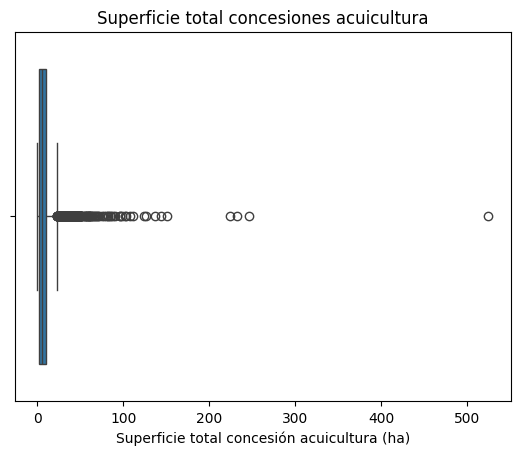

In [31]:
#Boxplot superficie total concesiones acuicultura
sns.boxplot(x=df_acuicultura["superficieTotal"])
plt.xlabel("Superficie total concesión acuicultura (ha)")
plt.title("Superficie total concesiones acuicultura")
plt.show()

Se observa una gran cantidad de outliers en la columna **superficieTotal**, por lo tanto, eliminarlos implicaría perder datos útiles que probablemente correspondan a concesiones empresariales.

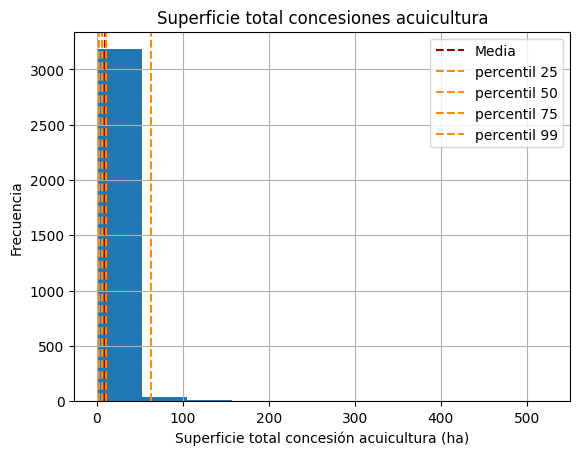

In [32]:
#Histograma superficie total concesiones acuicultura
df_acuicultura.hist('superficieTotal')
plt.axvline(df_acuicultura['superficieTotal'].mean(), label="Media", ls="--", color="darkred")
plt.axvline(df_acuicultura['superficieTotal'].quantile(.25), label="percentil 25", ls="--", color="darkorange")
plt.axvline(df_acuicultura['superficieTotal'].quantile(.5), label="percentil 50", ls="--", color="darkorange")
plt.axvline(df_acuicultura['superficieTotal'].quantile(.75), label="percentil 75", ls="--", color="darkorange")
plt.axvline(df_acuicultura['superficieTotal'].quantile(.99), label="percentil 99", ls="--", color="darkorange")
plt.legend()
plt.xlabel("Superficie total concesión acuicultura (ha)")
plt.ylabel("Frecuencia")
plt.title("Superficie total concesiones acuicultura")
plt.show()

In [33]:
#Aplica filtro para obtener dataset de concesiones que tengan una superficie total mayor a 100 ha
df_superficie = df_acuicultura[df_acuicultura["superficieTotal"] > 100]
df_superficie

,codigoCentro,numPert,Comuna,Region,Titulares,NumeroResSSP,FechaResSSP,ResultadoResolucionSSP,NumeroResSSFFAA,FechaResSSFFAA,ResultadoResolucionSSFFAA,EspeciesPT,GrupoPT,GRUPO ESPECIE AGRUPADO,toponimio,tipoBarrio,barrio,TipoPorcion,superficieTotal
117,120186,207121167,RIO VERDE,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,76794340-7: SALMONES BLUMAR MAGALLANES SPA.,2954,2016-10-05,Aprueba,3303,2016-12-28,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): ESTUARIO GÓMEZ CARREÑO, ENTRE PUNTA TEGUA...",ACS,53,(1): AGUA Y FONDO,144.00
193,120166,207122058,NATALES,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,78754560-2: AQUACHILE MAGALLANES SPA,3386,2014-12-15,Aprueba,978,2015-03-30,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): ESTERO POCA ESPERANZA, BRAZO DE HOJEDA, A...",ACS,48,(1): AGUA Y FONDO,111.50
300,120148,207122072,NATALES,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,78754560-2: AQUACHILE MAGALLANES SPA,1913,2013-07-26,Aprueba,1170,2014-04-04,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): NORTE DE PENÍNSULA STAINES, SECTOR 4",ACS,42,(1): AGUA Y FONDO,108.00
334,120131,207122057,NATALES,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,78754560-2: AQUACHILE MAGALLANES SPA,774,2013-03-22,Aprueba,2512,2013-06-24,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): CANAL VALDES, AL SUR DE PUNTA JONSHON",ACS,46,(1): AGUA Y FONDO,126.10
1629,110453,200111207,AISEN,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,86100500-3: SALMONES ANTARTICA S.A.,938,2003-05-06,Aprueba,1257,2003-06-06,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): FIORDO AYSÉN, ENTRE PUNTA ANGOSTA Y ESTER...",ACS,28B,(1): AGUA Y FONDO,150.22
2002,40154,199042006,COQUIMBO,REGIÓN DE COQUIMBO,71512500-5: A. G. PESCADORES TONGOY,559,2001-04-06,Aprueba,1433,2001-05-02,Aprueba,"OSTION DEL NORTE, OSTION DEL SUR",PECTINIDOS,MOLUSCOS,(1): BAHÍA TONGOY,NaN,NaN,(1): AGUA Y FONDO,103.50
2708,102019,91000810,CASTRO,REGIÓN DE LOS LAGOS,96633150-K: CAMANCHACA CULTIVOS SUR S.A.,77,1997-01-17,Aprueba,1034,1997-05-14,Aprueba,"CHOLGA, CHORITO, CHORO",MITILIDOS,MOLUSCOS,"(1): CANAL HUDSON, SECTOR PUNTA PULLAO",NaN,NaN,(1): AGUA Y FONDO,102.00
2895,101690,900000788,CHONCHI,REGIÓN DE LOS LAGOS,76065596-1: SALMONES CAMANCHACA S.A.,1527,1990-12-11,Aprueba,764,1995-03-31,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): CANAL YAL, AL SURESTE DE PUNTA TERAO",ACS,10B,(1): AGUA Y FONDO,123.88
3045,40011,900000096,COQUIMBO,REGIÓN DE COQUIMBO,76515665-3: SCALLOP CHILE S.A.,275,1986-03-18,Aprueba,426,1991-06-27,Aprueba,"OSTION DE CHILOE, OSTION DEL NORTE, OSTION DEL...",PECTINIDOS,MOLUSCOS,(1): BAHÍA GUANAQUERO,NaN,NaN,(1): AGUA Y FONDO,231.60
3097,100189,900000143,CALBUCO,REGIÓN DE LOS LAGOS,79784980-4: CERMAQ CHILE S.A.,107,1987-01-30,Aprueba,1190,1989-12-12,Aprueba,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",SALMONIDOS,PECES,"(1): ENSENADA CODIHUÉ, ENTRE PUNTA COLACO Y PU...",ACS,3B,(1): AGUA Y FONDO,223.56


Al observar la distribución de la superficie total para las concesiones de acuicultura, se comprueba que existen muy pocos valores superiores a 100 hectáreas. Al filtrar los datos de concesiones con superficie mayor a 100 hectáreas se comprueba que se trata mayoritariamente de concesiones correspondientes a empresas. La excepción es el caso de la Asociación Gremial de Pescadores de Tongoy.

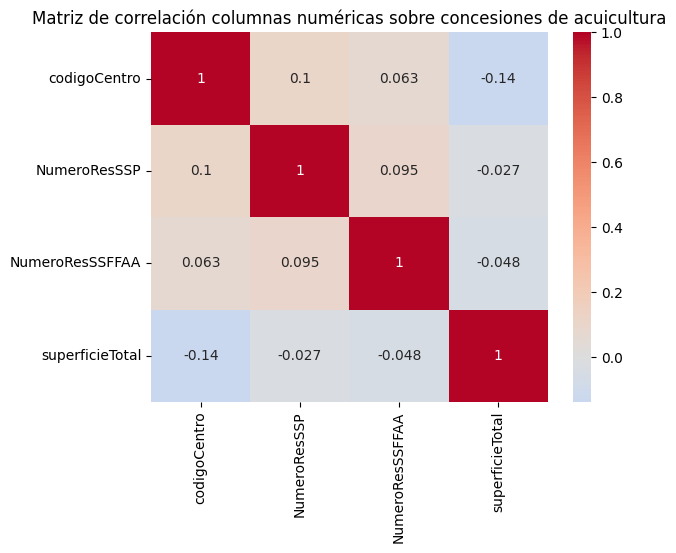

In [34]:
#Matriz de correlación de los valores numéricos del dataset
correlation_matrix = df_acuicultura.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación columnas numéricas sobre concesiones de acuicultura")
plt.show()

Al analizar la matriz de correlación no se observa que existan correlaciones entre las columnas numéricas de este dataset.